In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('Business_sales_EDA.csv', sep=';')

In [23]:
data

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,219627,Front of Store,Yes,clothing,No,1754,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,CROPPED WASHED T-SHIRT CHARCOAL,Running shoes. Upper in a combination of piece...,31.95,USD,jeans,WOMAN,Summer,Linen Blend,India
20248,219628,Aisle,No,clothing,No,872,Zara,https://www.zara.com/us/en/fleece-overshirt-p0...,SATIN WOVEN LEATHER SLIDES STONE,Slim fit shirt. Round neck and short sleeves.,49.99,USD,jackets,WOMAN,Spring,Linen,China
20249,219629,Aisle,Yes,clothing,No,1360,Zara,https://www.zara.com/us/en/faux-suede-patch-ja...,RELAXED CROPPED LEATHER JACKET CHARCOAL,Ankle boots. Made of leather with a suede fini...,20.99,USD,shoes,WOMAN,Spring,Polyester,China
20250,219630,Aisle,No,clothing,No,892,Zara,https://www.zara.com/us/en/fine-knit-crop-swea...,SLIM BASIC 100% WOOL SWEATER BURGUNDY,RETRO SNEAKERS,64.95,USD,jackets,WOMAN,Winter,Polyester,Spain


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [25]:
for col in data.columns:
    print(f"Column Name {col}: \n{data[col].unique()}")
    print('='*35)

Column Name Product ID: 
[185102 188771 180176 ... 219629 219630 219631]
Column Name Product Position: 
['Aisle' 'End-cap' 'Front of Store']
Column Name Promotion: 
['Yes' 'No']
Column Name Product Category: 
['clothing']
Column Name Seasonal: 
['Yes' 'No']
Column Name Sales Volume: 
[1243 1429 1168 ... 1756 1845  599]
Column Name brand: 
['Zara']
Column Name url: 
['https://www.zara.com/us/en/basic-puffer-jacket-p06985450.html'
 'https://www.zara.com/us/en/tuxedo-jacket-p08896675.html'
 'https://www.zara.com/us/en/slim-fit-suit-jacket-p01564520.html'
 'https://www.zara.com/us/en/stretch-suit-jacket-p01564300.html'
 'https://www.zara.com/us/en/double-faced-jacket-p08281477.html'
 'https://www.zara.com/us/en/contrasting-collar-jacket-p06987331.html'
 'https://www.zara.com/us/en/faux-leather-puffer-jacket-p08281420.html'
 'https://www.zara.com/us/en/suit-jacket-in-100-linen-p04307408.html'
 'https://www.zara.com/us/en/100-wool-suit-jacket-p05955218.html'
 'https://www.zara.com/us/en/100-

In [26]:
for col in data.columns:
    print(f"Column Name: \n{data[col].value_counts()}")
    print('='*35)

Column Name: 
Product ID
185102    1
188771    1
180176    1
112917    1
192936    1
         ..
219627    1
219628    1
219629    1
219630    1
219631    1
Name: count, Length: 20252, dtype: int64
Column Name: 
Product Position
Aisle             7810
End-cap           6791
Front of Store    5651
Name: count, dtype: int64
Column Name: 
Promotion
No     11812
Yes     8440
Name: count, dtype: int64
Column Name: 
Product Category
clothing    20252
Name: count, dtype: int64
Column Name: 
Seasonal
No     10136
Yes    10116
Name: count, dtype: int64
Column Name: 
Sales Volume
848     60
829     59
864     54
838     54
867     54
        ..
533      1
1890     1
1756     1
1845     1
599      1
Name: count, Length: 1284, dtype: int64
Column Name: 
brand
Zara    20252
Name: count, dtype: int64
Column Name: 
url
https://www.zara.com/us/en/knit-sweater-with-rips-p00021110.html                     187
https://www.zara.com/us/en/wool-blend-knit-sweater-p02893159.html                    185
https:

In [27]:
data.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

## Data Preprocessing

In [28]:
## Remove columns Product ID, url, description and currency column

data = data.drop(columns=['Product ID', 'url', 'description', 'currency', 'Product Category', 'brand'], axis=1)
data.head()

,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,section,season,material,origin
0,Aisle,Yes,Yes,1243,BASIC PUFFER JACKET,78.99,jackets,MAN,Winter,Polyester,Brazil
1,Aisle,Yes,No,1429,TUXEDO JACKET,14.99,jackets,MAN,Autumn,Cotton,Turkey
2,End-cap,Yes,Yes,1168,SLIM FIT SUIT JACKET,71.95,jackets,WOMAN,Autumn,Polyester,Morocco
3,Aisle,Yes,No,1348,STRETCH SUIT JACKET,30.99,jackets,MAN,Spring,Polyester,China
4,End-cap,Yes,Yes,1602,DOUBLE FACED JACKET,22.99,jackets,WOMAN,Winter,Wool Blend,China


In [29]:
## name column fill with most frequent value 
data['name'].fillna(data['name'].mode()[0], inplace=True)

In [30]:
data.isnull().sum()

Product Position    0
Promotion           0
Seasonal            0
Sales Volume        0
name                0
price               0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Position  20252 non-null  object 
 1   Promotion         20252 non-null  object 
 2   Seasonal          20252 non-null  object 
 3   Sales Volume      20252 non-null  int64  
 4   name              20252 non-null  object 
 5   price             20252 non-null  float64
 6   terms             20252 non-null  object 
 7   section           20252 non-null  object 
 8   season            20252 non-null  object 
 9   material          20252 non-null  object 
 10  origin            20252 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


In [32]:
## Replace MAN to male and WOMAN to female
data['section'] = data['section'].replace({
    'MAN': 'male',
    'WOMAN': 'female'
}).str.strip()

## Change the column section to gender
data.rename(columns={'section' : 'gender'}, inplace=True)

## Price should be float
data['price'] = pd.to_numeric(data['price'], errors='coerce')


data.head()

,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,gender,season,material,origin
0,Aisle,Yes,Yes,1243,BASIC PUFFER JACKET,78.99,jackets,male,Winter,Polyester,Brazil
1,Aisle,Yes,No,1429,TUXEDO JACKET,14.99,jackets,male,Autumn,Cotton,Turkey
2,End-cap,Yes,Yes,1168,SLIM FIT SUIT JACKET,71.95,jackets,female,Autumn,Polyester,Morocco
3,Aisle,Yes,No,1348,STRETCH SUIT JACKET,30.99,jackets,male,Spring,Polyester,China
4,End-cap,Yes,Yes,1602,DOUBLE FACED JACKET,22.99,jackets,female,Winter,Wool Blend,China


## Data Visualization

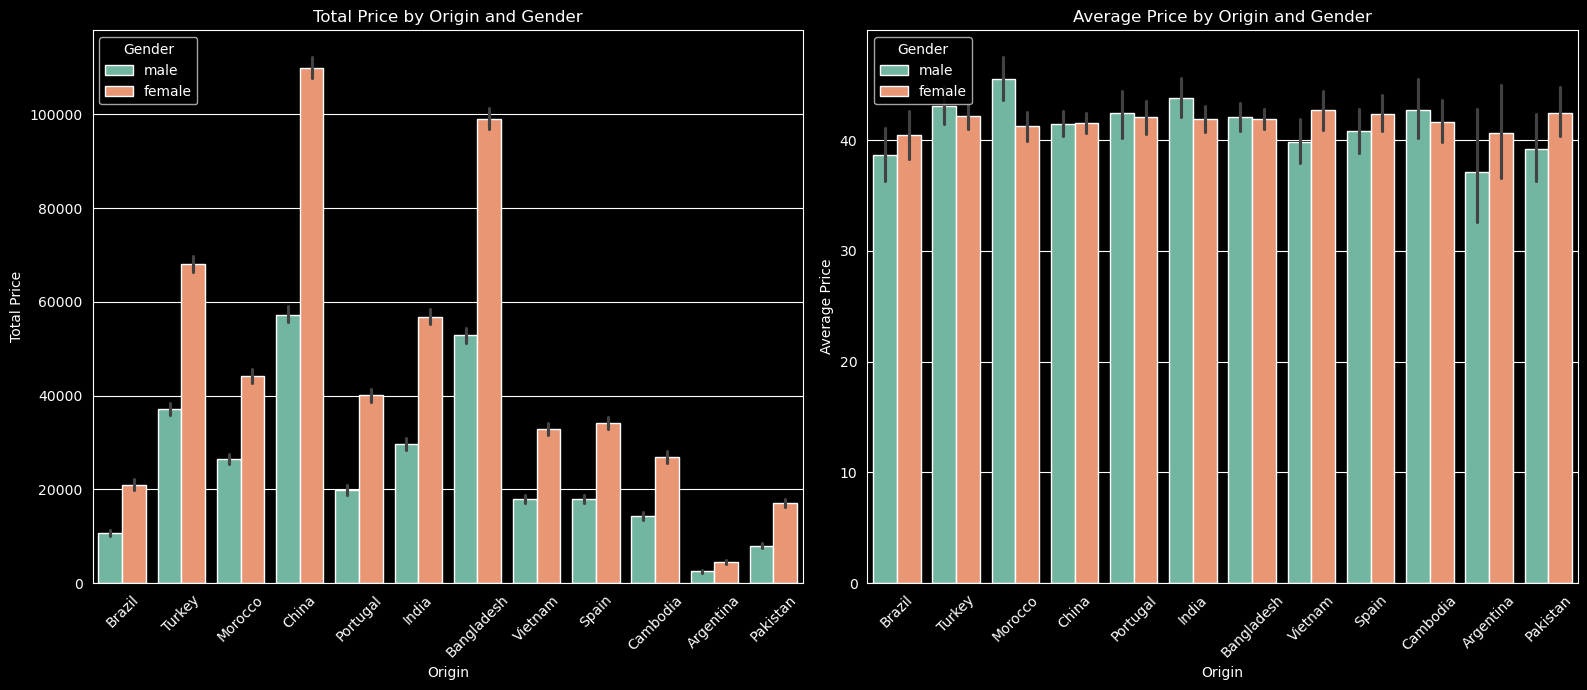

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.barplot(
    data=data,
    x='origin',
    y='price',
    hue='gender',
    estimator='sum',
    palette='Set2'
)
plt.title("Total Price by Origin and Gender")
plt.xlabel("Origin")
plt.ylabel("Total Price")
plt.xticks(rotation=45)

plt.legend(title="Gender", loc='upper left', bbox_to_anchor=(0, 1))

plt.subplot(1, 2, 2)
sns.barplot(
    data=data,
    x='origin',
    y='price',
    hue='gender',
    estimator='mean',
    palette='Set2'
)
plt.title("Average Price by Origin and Gender")
plt.xlabel("Origin")
plt.ylabel("Average Price")
plt.xticks(rotation=45)

plt.legend(title="Gender", loc='upper left', bbox_to_anchor=(0, 1))

plt.tight_layout()
plt.show()


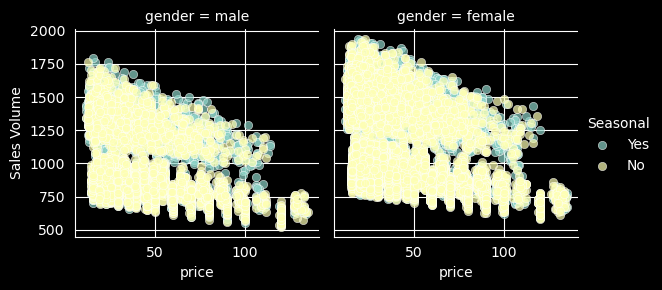

In [42]:
g = sns.FacetGrid(data, col='gender', hue='Seasonal')
g.map(sns.scatterplot, "price", "Sales Volume", alpha = .7)
g.add_legend()

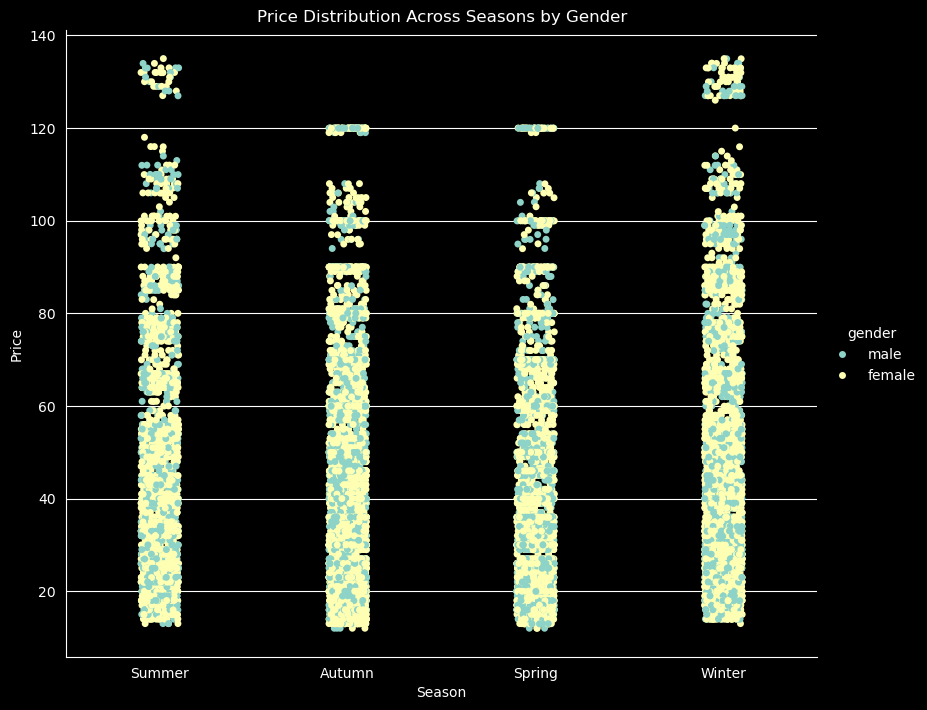

In [44]:
order = ['Summer', 'Autumn', 'Spring', 'Winter']
plt.Figure(figsize=(9, 7))
sns.catplot(
    data=data,
    x='season',
    y='price',
    hue='gender',
    order=order,
    height=7,
    aspect=1.2
)
plt.xlabel("Season")
plt.ylabel("Price")
plt.title("Price Distribution Across Seasons by Gender")
plt.show()

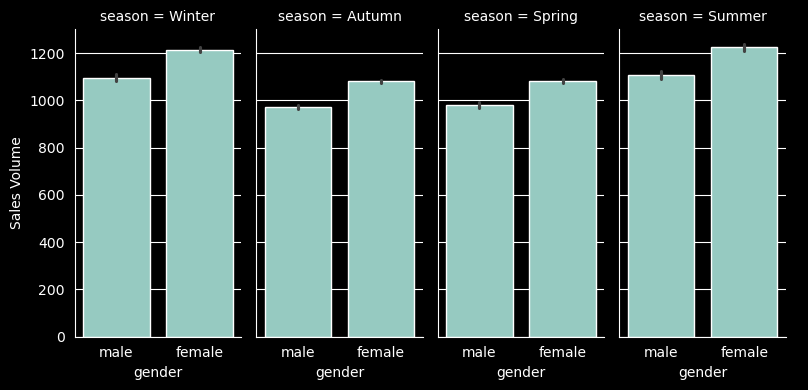

In [53]:
g = sns.FacetGrid(data, col='season', height=4, aspect=.5)
g.map(sns.barplot, "gender", "Sales Volume", order=['male', 'female'])
g.add_legend()

<Figure size 1000x700 with 0 Axes>

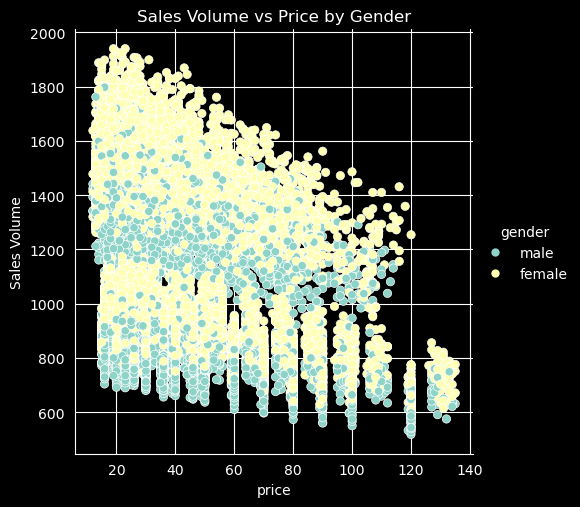

In [35]:
plt.figure(figsize=(10, 7)),
sns.relplot(
    data=data,
    x='price',
    y='Sales Volume',
    hue='gender'
)
plt.xlabel('price')
plt.ylabel('Sales Volume')
plt.title("Sales Volume vs Price by Gender")
plt.show()

<Axes: xlabel='price', ylabel='Sales Volume'>

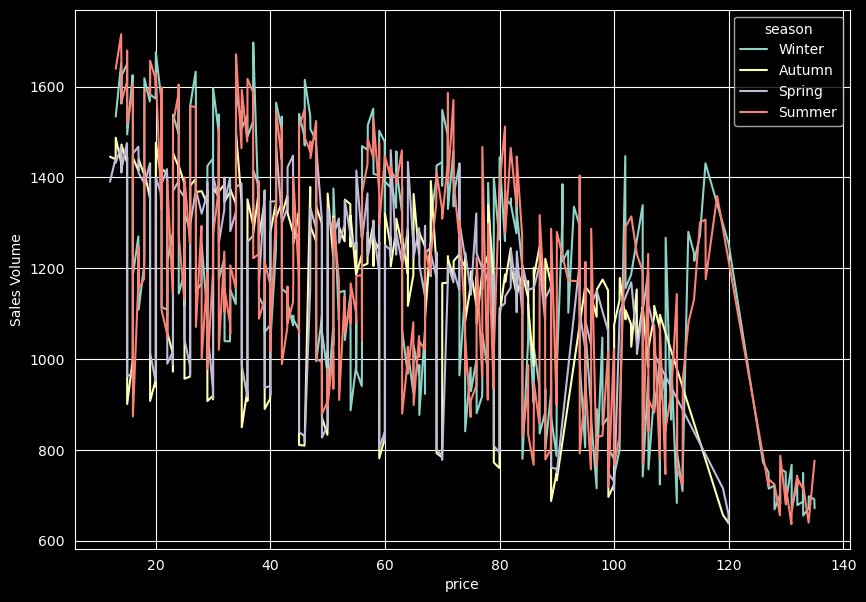

In [36]:
plt.figure(figsize=(10, 7))
sns.lineplot(
    data=data,
    x='price',
    y='Sales Volume',
    hue='season',
    estimator='mean',
    errorbar=None
)

<Axes: xlabel='price', ylabel='Density'>

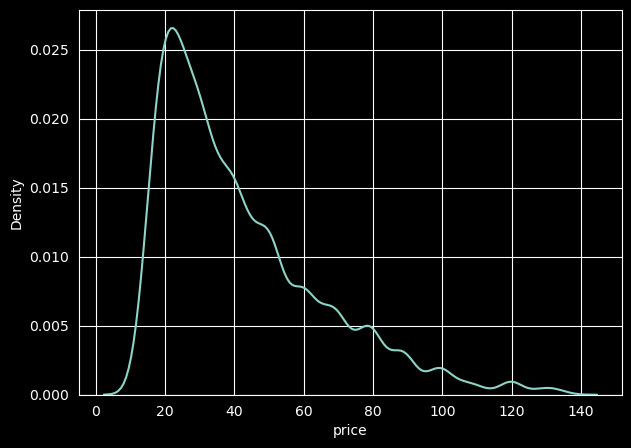

In [37]:
plt.figure(figsize=(7, 5))
sns.kdeplot(data['price'])

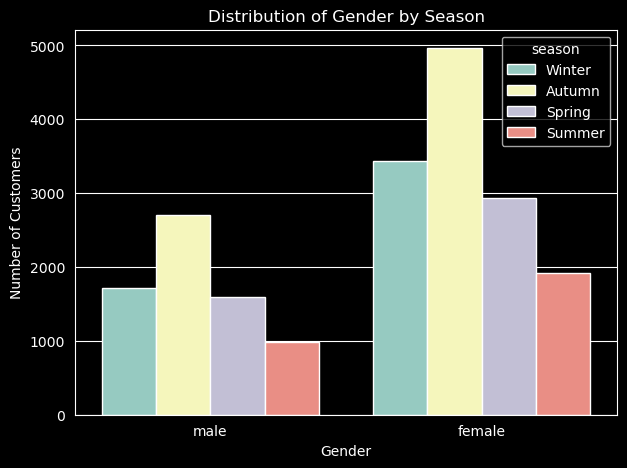

In [38]:
plt.figure(figsize=(7, 5))
sns.countplot(
    data=data,
    x='gender',
    hue='season'
)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of Gender by Season')
plt.show()

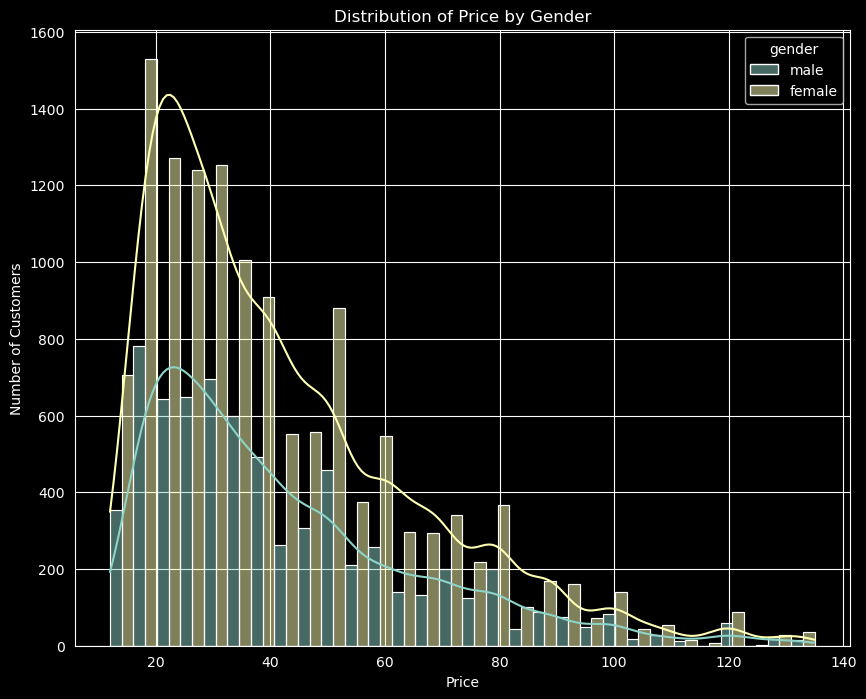

In [39]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data,
    x='price',
    kde=True,
    hue='gender',
    bins=30,
    multiple='dodge'
)
plt.xlabel('Price')
plt.ylabel('Number of Customers')
plt.title('Distribution of Price by Gender')
plt.show()

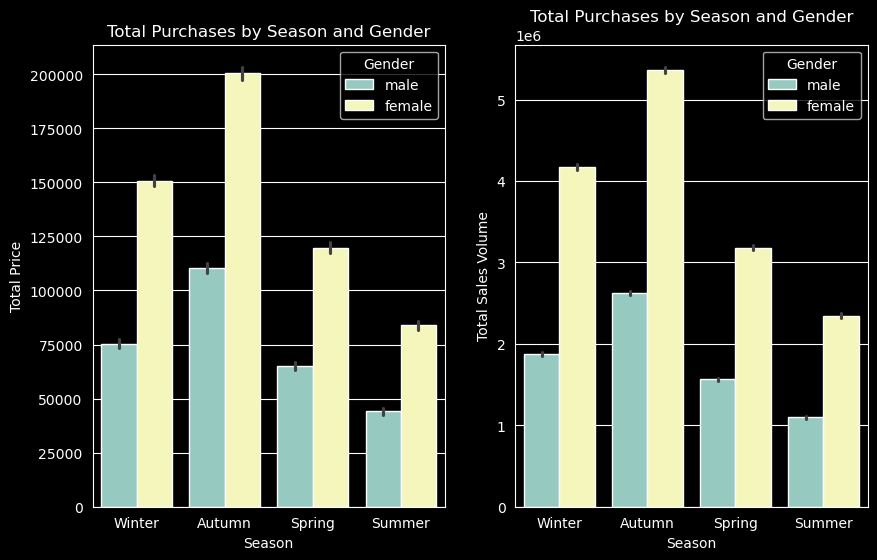

In [40]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(
    data=data,
    x='season',
    y='price',
    hue='gender',
    estimator='sum'
)
plt.title('Total Purchases by Season and Gender')
plt.xlabel('Season')
plt.ylabel('Total Price')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.barplot(
    data=data,
    x='season',
    y='Sales Volume',
    hue='gender',
    estimator='sum'
)
plt.title('Total Purchases by Season and Gender')
plt.xlabel('Season')
plt.ylabel('Total Sales Volume')
plt.legend(title='Gender')
plt.show()